# Evaluation

## Scalability with data size

Tested on a 20-dimensional data set containing 5 clusters i 5 different subspaces. 10% of the data was added as noise records.

SUBCLU stopped to work after 200,000 points. CLIQUE stopped to work after 7mio points.

### Settings

CLIQUE:
- xsi: 25
- tau: 0.08

SUBCLU:
- epsilon 0.02
- minpts: 250 (for 10k points). Doubled for each step, so 500 minpts for 20k, 1000 minpts for 40k, etc.

MAFIA:
-a 1.4
-b 0.35
-M 20
-n 1000
-V
--timing

### Plot

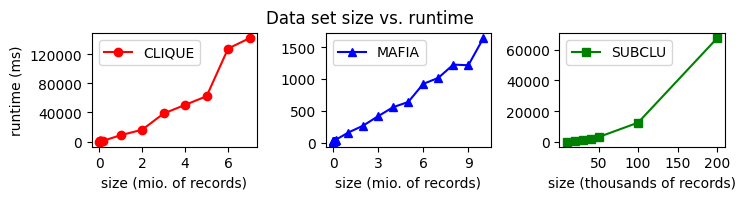

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Data
size =   [10000, 20000, 30000, 40000, 50000, 100000, 200000, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000, 15000000]
clique = [62   , 119  , 155  , 203  , 235  , 533   , 1255  , 8795   , 16290  , 38581  , 50392  , 62348  , 127730 , 142005]
mafia =  [15   , 25   , 17   , 22   , 27   , 31    , 45    , 155    , 265    , 414    , 556    , 637    , 922    , 1016   , 1225   , 1215   , 1641]
subclu = [137  , 477  , 984  , 1751 , 3055 , 12490 , 67603]

# Figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(7.5, 2))

# CLIQUE (size in millions)
axs[0].plot([s / 1_000_000 for s in size[:len(clique)]], clique, 'ro-', label='CLIQUE')
axs[0].set_xlabel('size (mio. of records)')
axs[0].set_ylabel('runtime (ms)')
axs[0].xaxis.set_major_locator(ticker.MaxNLocator(5))
axs[0].yaxis.set_major_locator(ticker.MaxNLocator(5))
axs[0].legend()

# MAFIA (size in millions)
axs[1].plot([s / 1_000_000 for s in size[:len(mafia)]], mafia, 'b^-', label='MAFIA')
axs[1].set_xlabel('size (mio. of records)')
axs[1].xaxis.set_major_locator(ticker.MaxNLocator(4))
axs[1].yaxis.set_major_locator(ticker.MaxNLocator(4))
axs[1].legend()

# SUBCLU (size in thousands)
axs[2].plot([s / 1000 for s in size[:len(subclu)]], subclu, 'gs-', label='SUBCLU')
axs[2].set_xlabel('size (thousands of records)')
axs[2].xaxis.set_major_locator(ticker.MaxNLocator(5))
axs[2].yaxis.set_major_locator(ticker.MaxNLocator(4))

axs[2].legend()

# Show plots
plt.suptitle('Data set size vs. runtime')
plt.tight_layout(rect=[0, 0, 1, 1.1])
plt.show()

## Accuracy

Tested on a 10-dimensional data set containing 100,000 points for testing CLIQUE and MAFIA, however, SUBCLU was not able to handle this amount of data, so it was tested on a similar distribution of points with 20,000 points. 10% of the data was added as noise records.

The first case, has two clusters embedded in a different 4 dimensional subspace. Second case, has 4 clusters embedded in a different 4 dimensional subspace.

MAFIA reports the correct clusters in both cases with proper use of parameters. However, CLIQUE reports...

### 2 clusters

#### Settings

SUBCLU:
- epsilon: 0.05
- minpts: 850

CLIQUE:
- xsi: 20
- tau: 0.41
- prune: false

MAFIA:
-a 3
-b 0.6
-M 20
-n 1000
-V
-p
--timing

#### Plot

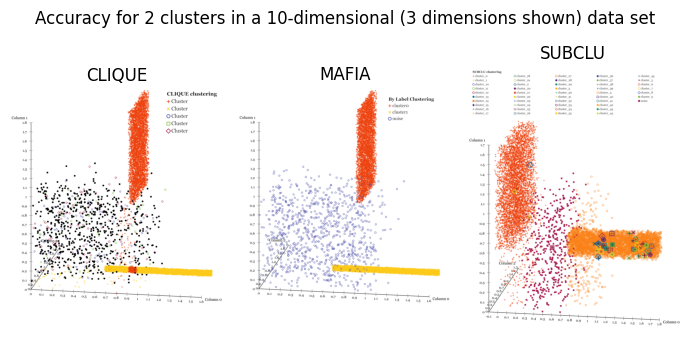

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load images
clique_img = mpimg.imread('data-generator/datasets/mdcgen/accuracy/2clusters/100k/clique/3d_plot.png')
mafia_img = mpimg.imread('data-generator/datasets/mdcgen/accuracy/2clusters/100k/mafia/3d_plot.png')
subclu_img = mpimg.imread('data-generator/datasets/mdcgen/accuracy/2clusters/20k/subclu/3d_plot.png')

# Figure with subplots
fig, axs = plt.subplots(1, 3, figsize=(7, 4))

# Plot images
axs[0].imshow(clique_img)
axs[0].axis('off')
axs[0].set_title('CLIQUE')

axs[1].imshow(mafia_img)
axs[1].axis('off')
axs[1].set_title('MAFIA')

axs[2].imshow(subclu_img)
axs[2].axis('off')
axs[2].set_title('SUBCLU')

# Title
plt.suptitle('Accuracy for 2 clusters in a 10-dimensional (3 dimensions shown) data set')

# Show plot
plt.tight_layout(rect=[0, 0, 1, 1.1])
plt.show()

### 4 clusters

#### Settings

SUBCLU:
- epsilon: 0.02
- minpts: 500

CLIQUE:
- xsi: 35
- tau: 0.2

MAFIA:
-a 3
-b 0.6
-M 100
-n 1000
-V
-p
--timing

#### Plot

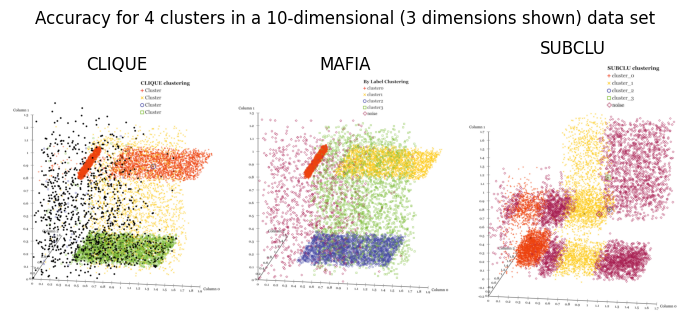

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load images
clique_img = mpimg.imread('data-generator/datasets/mdcgen/accuracy/4clusters/100k/clique/3d_plot.png')
mafia_img = mpimg.imread('data-generator/datasets/mdcgen/accuracy/4clusters/100k/mafia/3d_plot.png')
subclu_img = mpimg.imread('data-generator/datasets/mdcgen/accuracy/4clusters/20k/subclu/3d_plot.png')

# Figure with subplots
fig, axs = plt.subplots(1, 3, figsize=(7, 4))

# Plot images
axs[0].imshow(clique_img)
axs[0].axis('off')
axs[0].set_title('CLIQUE')

axs[1].imshow(mafia_img)
axs[1].axis('off')
axs[1].set_title('MAFIA')

axs[2].imshow(subclu_img)
axs[2].axis('off')
axs[2].set_title('SUBCLU')

# Title
plt.suptitle('Accuracy for 4 clusters in a 10-dimensional (3 dimensions shown) data set')

# Show plot
plt.tight_layout(rect=[0, 0, 1, 1.15])
plt.show()

### Plus shape

#### Settings
CLIQUE:
- xsi: 10
- tau: 0.2

#### Plot

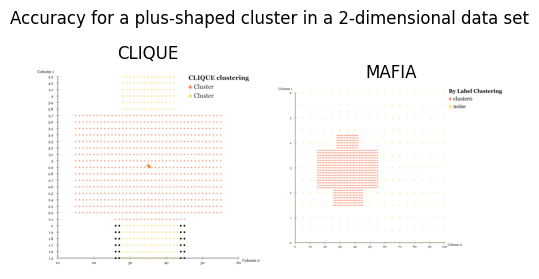

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load images
clique_img = mpimg.imread('data-generator/datasets/home_made/accuracy/plus_shape/clique/plot.png')
mafia_img = mpimg.imread('data-generator/datasets/home_made/accuracy/plus_shape/mafia/plot.png')

# Figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(5, 4))

# Plot images
axs[0].imshow(clique_img)
axs[0].axis('off')
axs[0].set_title('CLIQUE')

axs[1].imshow(mafia_img)
axs[1].axis('off')
axs[1].set_title('MAFIA')

# Title
plt.suptitle('Accuracy for a plus-shaped cluster in a 2-dimensional data set')

# Show plot
plt.tight_layout(rect=[0, 0, 1, 1.25])
plt.show()

### Bezier curve

#### Settings

SUBCLU:
- epsilon: 0.005
- minpts: 20

CLIQUE:
- xsi: 20
- tau: 0.06

#### Plot

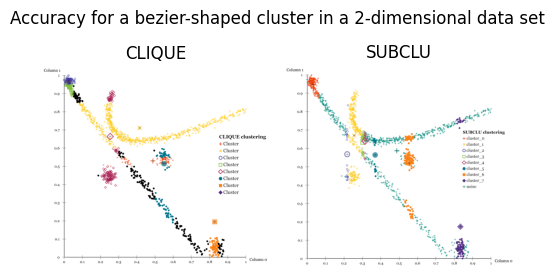

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load images
clique_img = mpimg.imread('data-generator/datasets/artificalCluster/accuracy/bezier/clique/plot.png')
subclu_img = mpimg.imread('data-generator/datasets/artificalCluster/accuracy/bezier/subclu/plot.png')

# Figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(5, 4))

# Plot images
axs[0].imshow(clique_img)
axs[0].axis('off')
axs[0].set_title('CLIQUE')

axs[1].imshow(subclu_img)
axs[1].axis('off')
axs[1].set_title('SUBCLU')

# Title
plt.suptitle('Accuracy for a bezier-shaped cluster in a 2-dimensional data set')

# Show plot
plt.tight_layout(rect=[0, 0, 1, 1.25])
plt.show()

## Cluster dimensionality

### Settings

CLIQUE:
- xsi: 30
- tau: 0.25

MAFIA:
-a 2.2
-b 0.35
-M 40
-n 1000
-p
-V
--timing

### Plot

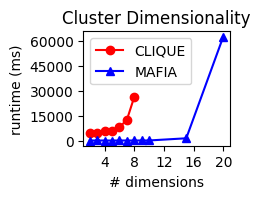

In [6]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Data
dims =   [2   , 3   , 4   , 5   , 6   , 7    , 8    , 9 , 10, 15 , 20]
mafia =  [45  , 63  , 55  , 45  , 63  , 55   , 60   , 79, 86, 1387, 62607]
clique = [4440, 4347, 6017, 5740, 8093, 12532, 26373]

# Figure size
plt.figure(figsize=(2.5, 2.1))

# Plot both in same figure
plt.plot(dims[:len(clique)], clique, 'ro-', label='CLIQUE')
plt.plot(dims, mafia, 'b^-', label='MAFIA')

# Set number of x-ticks
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(6))
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(6))

# Add labels and title
plt.xlabel('# dimensions')
plt.ylabel('runtime (ms)')
plt.title('Cluster Dimensionality')

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

## Data dimensionality

MAFIA and CLIQUE was on a 100 k dataset.

### Settings

CLIQUE:
- xsi: 30
- tau: 0.3
- prune: false

MAFIA:
-a 2.2
-b 0.35
-M 40
-n 1000
-p
-V
--timing

### Plot

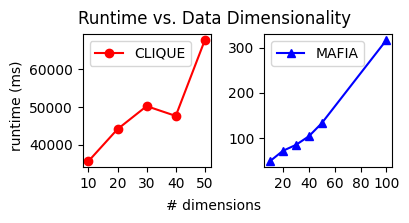

In [7]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Data
dims =   [10   , 20   , 30   , 40   , 50 , 100]
mafia_runtime =  [49   , 72   , 85   , 104  , 133, 317]
clique_runtime = [35688, 44180, 50275, 47682, 67772]

# CLIQUE:
# 10d = 66 clusters found
# 20d = 84
# 30d = 93
# 40d = 77
# 50d = 93
# 100d, not able to run.

# MAFIA:
# 10d  = 3 clusters found
# 20d  = 4 clusters found
# 30d  = 3 clusters found
# 40d  = 4 clusters found
# 50d  = 3 clusters found
# 100d = 4 clusters found

# Figure with 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(4, 2))

# CLIQUE
axs[0].plot(dims[:len(clique_runtime)], clique_runtime, 'ro-', label='CLIQUE')
axs[0].legend()
axs[0].xaxis.set_major_locator(ticker.MaxNLocator(5))

# MAFIA
axs[1].plot(dims, mafia_runtime, 'b^-', label='MAFIA')
axs[1].legend()
axs[1].xaxis.set_major_locator(ticker.MaxNLocator(5))

# Common x and y labels
fig.text(0.5, -0.02, '# dimensions', ha='center')
fig.text(-0.01, 0.5, 'runtime (ms)', va='center', rotation='vertical')

# Show plot
plt.suptitle('Runtime vs. Data Dimensionality')
plt.tight_layout(rect=[0, 0, 1, 1.1])
plt.show()

## Sensitivity of alpha
As observed in article. Alpha and beta controls the number of clusters and their quality.

- 1,000,000 data points
- 20 dims
- 5 clusters
- 10% outliers
- noiseMatrix:
1
3
5
7
8

### Settings
-b 0.35
-M 40
-n 1000

-a 0.8 -> 5.2 (step size: 0.4)

### Plot

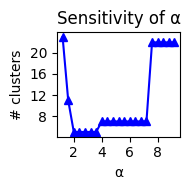

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Data
alpha = np.arange(1.2, 9.6, 0.4)
clusters_found = [23, 11, 5, 5, 5, 5, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 22, 22, 22, 22, 22]

# Figure size
plt.figure(figsize=(2, 2))

# Plot
plt.plot(alpha, clusters_found, 'b^-')

# Set number of x- and y-ticks
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(5))
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(5))

# Add labels and title
plt.xlabel('α')
plt.ylabel('# clusters')
plt.title('Sensitivity of α')

# Show plot
plt.tight_layout()
plt.show()

# Export to pdf

1. Install a LaTeX distribution.
   - Windows: MikTeX
   - Mac: MacTeX
   - Linux: TeX Live
2.  Install pandoc (https://pandoc.org/), make sure it can be found using `pandoc --version`. Otherwise, try to re-open terminal.
3.  Convert to pdf by running the following command: `jupyter nbconvert --to pdf evaluation.ipynb`. 